In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import turtle
import random
import math
import sys

from tqdm import tqdm                                  # Library to show a progress bar

In [2]:
df_cities = pd.read_csv('c:/DEV/CT5102/cities_FULL.csv')    # Create the dataframe 'df_cities' from the csv
city_coordinates = df_cities[['X','Y']].values              # Extract X and Y values from the CSV
num_cities, cols = city_coordinates.shape                   # Use .shape function to count rows and columns

In [3]:
df_cities.head()                                       # Print the first five lines of the csv

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


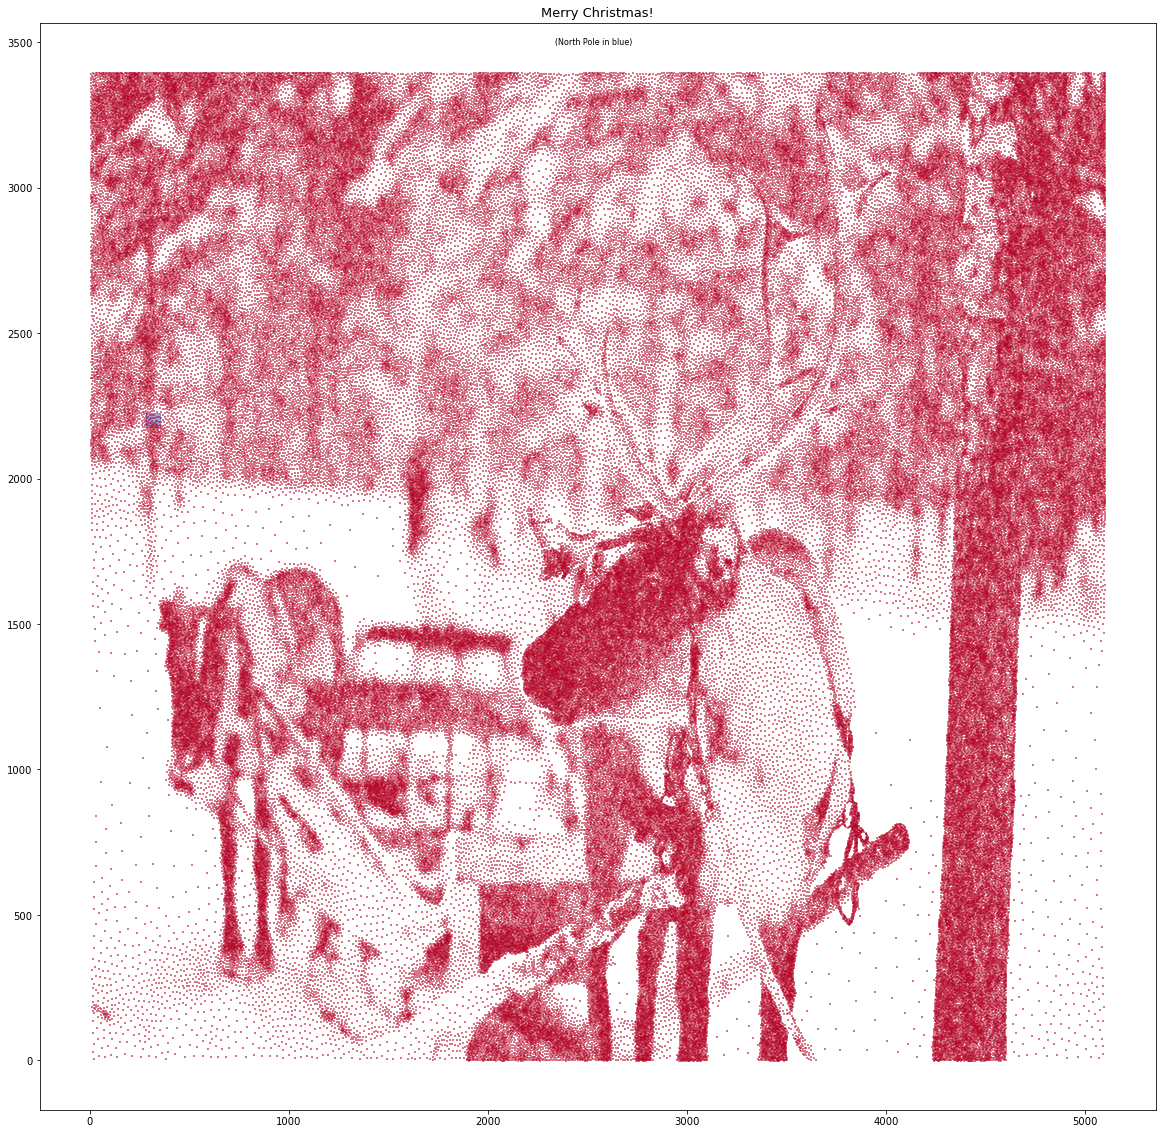

In [4]:
plt.figure(figsize=(20,20))                                  # Set size of plot
plt.scatter(df_cities['X'], df_cities['Y'], marker = ',',    # Mark X and Y axis on scatterplot
            c=(df_cities.CityId != 0).astype(int), cmap='coolwarm',     # Plot all locations that are not 0 with colourmap 'coolwarm'
            alpha = 0.5, s = 200*(df_cities.CityId == 0).astype(int)+1) # Set the plot transparency to 0.5, plot the start point (index 0) at larger size
plt.title("Merry Christmas!", fontsize = 13)                 # Give scatterplot a title and state size of text
plt.suptitle("(North Pole in blue)", x=0.51, y=0.87, fontsize = 8)      # Set a subtitle, show where to put it and the size of text
plt.show()                                                   # Print out scatterplot

In [5]:
# Put all the prime numbers into one array and the rest of the numbers into a second array
primes = [True for x in range(num_cities + 1)]
primes[0] = primes[1] = False
for i in tqdm(range(2, num_cities + 1)): 
    if primes[i]:
        q = i * 2
        while q <= num_cities:
            primes[q] = False
            q += i
primes = np.asarray(primes)
notprimes = np.asarray([not x for x in primes])

100%|██████████████████████████████████████████████████████████████████████| 197768/197768 [00:00<00:00, 455658.83it/s]


Djikstra's algorithm search begins here

In [6]:
df_cities = pd.read_csv(r'c:/DEV/CT5102/cities.csv')         # Create the dataframe 'df_cities' from the csv
city_coordinates = df_cities[['X','Y']].values               # Extract X and Y values from the CSV
num_cities, cols = city_coordinates.shape                    # Use .shape to count rows and columns

def plot_route():
    start_point = np.array(city_coordinates[0])               # Identify the start point

    current_city_coords = np.array(city_coordinates[0])       # Initialise at the start point

    unvisited_cities = [x for x in range(1, num_cities)]      # Create list of unvisited cities
    unvisited_coordinates = np.array(city_coordinates[1:])    # Remove the start point from the array

    unvisited = num_cities - 1                                # Reduce the count by 1 (the start point)

    path = []                                                 # Create a blank list for the best route
    total_distance = 0                                        # Track distance starting at zero

    # Find the route
    for visit in tqdm(range(1, num_cities, 1)):               # Visit each city from index 1 to the end
        distances = np.linalg.norm(unvisited_coordinates[:unvisited] - current_city_coords, axis=1) # Calculate the distance from the current location

        # If it is a tenth city then increase the total by 10%
        if visit % 10 == 0:                                   
            distances += np.multiply(distances, notprimes[unvisited_cities[:unvisited]]) * 0.1

        # Work out the shortest distance to the next city
        closest_city_index = np.argmin(distances)             
        closest_city = unvisited_cities[closest_city_index]
        current_city_coords = np.array(unvisited_coordinates[closest_city_index]) 

        # Add that distance to the total
        total_distance += distances[closest_city_index]       
        path.append(closest_city)

        # Remove that city from the two lists
        unvisited_coordinates[closest_city_index] = unvisited_coordinates[unvisited - 1]
        unvisited_cities[closest_city_index] = unvisited_cities[unvisited - 1]
        
        unvisited -= 1                                        # Reduce the count by one
    
    path = [0] + path[::-1] + [0]                             # Loop back to the start point to finish
    last_dist = np.linalg.norm(start_point - current_city_coords) # Calculate the distance back to the start
    total_distance += last_dist                               # And add that to the total
    return (path, total_distance)

best_path, score = plot_route()                               # Plot the shortest route
print ("Expected score: {}".format(score))                    # Print out the result

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 7754.01it/s]

Expected score: 234455.08067149803


Djikstra's algorithm search ends here

'Gradient Descent' search begins here

In [ ]:
# if RNG seed is None, defaults to system time
rng_seed = None
number_iterations = 10
number_cities = 30


def main():
    # Just to be sure we don't accidentally
    # create a new rng_seed if we edit code later
    global rng_seed

    get_arguments()

    # Could add a fixed seed for debugging
    random.seed(rng_seed)
    citylocations = []

    # Generating the Cities
    for i in range(0, number_cities):
        citylocations.append(
            (random.randint(-299, 299),
             random.randint(-299, 299)))

    # Setting up the screen (for turtle)
#    screen = turtle.Screen()
#    turtle.speed(0)
#    screen.setup(600, 600)

    # Run 50 iteration of Gradient Descent search
    for i in range(0, number_iterations):
        citylocations = gd_iteration(citylocations)

    # Pause turtle until clicked
#    screen.exitonclick()


def get_arguments():
    global number_cities
    global number_iterations
    global rng_seed

    # If no command line arguments supplied then
    # default and return function
    if len(sys.argv) == 1:
        print(f"Usage: {sys.argv[0]} <number of cities> <number of "
              "iterations> <rng seed>")
        print(f"Defaulting to:\nnumber of cities={number_cities},"
              f"\nnumber of iterations={number_iterations},"
              f"\nrng seed={rng_seed}")
        return

    # If they have been supplied but cause an error
    # (are incorrect) print help and exit
    try:
        number_cities = int(sys.argv[1])
        number_iterations = int(sys.argv[2])
        rng_seed = int(sys.argv[3])
    except:
        try:
            number_cities = int(sys.argv[1])
            number_iterations = int(sys.argv[2])
        except:
            raise SystemExit(f"Usage: {sys.argv[0]}"
                             "<number of cities> <number of iterations>"
                             "<rng seed (optional)>")


def gd_iteration(citylocations):
    # Create a list of candidates
    candidates = create_candidates(citylocations)

    # Get a sorted list of candidates
    # lowest (i.e. best) first
    scored_candidates = sorted(candidates, key=objective_function)

    # The best scored candidate is our choice
    best_candidate = scored_candidates[0]

    # Draw its path, and return it
#    drawpath(best_candidate)
    return best_candidate


def objective_function(candidate):
    sum = 0

    for i in range(0, number_cities):
        if i == number_cities - 1:
            sum = sum + euclidean_distance(candidate[-1], candidate[0])
        else:
            sum = sum + euclidean_distance(candidate[i], candidate[i+1])

    return sum


def euclidean_distance(pointa, pointb):
    return math.sqrt(
        math.pow(pointa[0] - pointb[0], 2) +
        math.pow(pointa[1] - pointb[1], 2))


def create_candidates(citylocations):
    candidates = []

    for i in range(0, number_cities):

        candidate = []

        if i == number_cities - 1:
            candidate.append(citylocations[-1])
            candidate.extend(citylocations[1:-1])
            candidate.append(citylocations[0])
        else:
            for j in range(0, number_cities):
                if not j == i and not j == i + 1:
                    candidate.append(citylocations[j])
                elif j == i and not i == number_cities - 1:
                    candidate.append(citylocations[i+1])
                    candidate.append(citylocations[i])

            if i == number_cities - 1:
                candidate.append(citylocations[0])

        candidates.append(candidate)

    return candidates


if __name__ == '__main__':
    main()



'Gradient Descent' search ends here

'TABU' search begins here

In [ ]:
rng_seed = None
number_iterations = 2

tabu_length = 2
tabu_list = []

In [ ]:
def main():
    # Just to be sure we don't accidentally
    # create a new rng_seed if we edit code later
    global rng_seed

    # Sets globals according to command line args
    #get_arguments()

    # Could add a fixed seed for debugging
    random.seed(rng_seed)
    citylocations = [[316, 2202], [4377, 336], [3454, 2830]]

    # Generating the Cities
#    for i in range(0, number_cities):
#        citylocations.append(
#            (random.randint(-299, 299),
#             random.randint(-299, 299)))

    # Setting up the screen (for turtle)
#    screen = turtle.Screen()
#    turtle.speed(0)
#    screen.setup(600, 600)

    # Run 50 iterations of TABU search
    for i in range(0, number_iterations):
        citylocations = tabu_iteration(citylocations)

    # Pause turtle until clicked
#    screen.exitonclick()

    
def get_arguments():
    global number_cities
    global number_iterations
    global rng_seed
    global tabu_length

    # If no command line arguments supplied then
    # default and return function
    if len(sys.argv) == 1:
        print(
            f"Usage: {sys.argv[0]} <number of cities>"
            "<number of iterations> <tabu_length> <rng seed>")
        print(f"Defaulting to:\nnumber of cities={number_cities},"
              f"\nnumber of iterations={number_iterations},"
              f"\ntabu length={tabu_length},"
              f"\nrng seed={rng_seed}")

        return

    # If they have been supplied but cause an error
    # (are incorrect) print help and exit
 # comment out all of these vvv   try:
        number_cities = int(sys.argv[1])
        number_iterations = int(sys.argv[2])
        tabu_length = int(sys.argv[3])
        rng_seed = int(sys.argv[4])
 #   except:                                                     # this section commented out to get it to run
 #       try:
 #           number_cities = int(sys.argv[1])
 #           number_iterations = int(sys.argv[2])
 #           tabu_length = int(sys.argv[3])
 #       except:
 #           raise SystemExit(
 #               f"Usage: {sys.argv[0]} <number of cities>"
 #               "<number of iterations> <tabu_length> <rng seed>")

            
def tabu_iteration(citylocations):
    # Make sure we have write access to our
    # TABU list
    global tabu_list
    global tabu_length

    # Create a list of candidates
    candidates = create_candidates(citylocations)
    

    # Get a sorted list of candidates
    # lowest (i.e. best) first
    scored_candidates = sorted(candidates, key=objective_function)

    # Check if each candidate (in order) is TABU
    # tabu check will return true if a candidate
    # is not in the list, or is in the list but
    # is allowed by aspiration criteria
    usable_candidate = None
    for scored_candidate in scored_candidates:
        if tabu_check(scored_candidate):
            usable_candidate = scored_candidate
            break

    # Draw's the current path using turtle
    # drawpath(usable_candidate)

    # Add current usable candidate to the tabu list
    tabu_list.append(usable_candidate)

    # While tabu list is oversize, reduce it!
    while len(tabu_list) > tabu_length:
        tabu_list.pop(0)

    # Return selected candidate
    return usable_candidate


def tabu_check(candidate):
    # Make sure we have write access to our global tabu list
    global tabu_list

    # Set our flag to true initially
    usable = True

    # Perform checks and set flag to false if needed
    for tabu_candidate in tabu_list:
        if tabu_candidate == candidate and \
            (objective_function(tabu_list[-1]) -
             objective_function(tabu_candidate)) < 100:
            usable = False
            break

    # Return the flag value
    return usable


def objective_function(candidate):
    # Sum set initially to 0
    sum = 0

    # For each city pair,
    for i in range(0, number_cities):
        if i == number_cities - 1:
            sum = sum + euclidean_distance(candidate[-1], candidate[0])
        else:
            sum = sum + euclidean_distance(candidate[i], candidate[i+1])

    return sum


def euclidean_distance(pointa, pointb):
    return math.sqrt(
        math.pow(pointa[0] - pointb[0], 2) +
        math.pow(pointa[1] - pointb[1], 2))


def create_candidates(citylocations):
    candidates = []
    mycity = citylocations
    print('mycity',mycity)
    print(candidates)
    number_cities =3

    for i in range(0, 1):

        candidate = []
        print(candidate)

        if i == number_cities-1:
            candidate.append(citylocations[-1])
            candidate.extend(citylocations[1:-1])
            candidate.append(citylocations[0])
            
       
        else:
            for j in range(0, number_cities):
                if not j == i and not j == i + 1:
                    candidate.append(citylocations[j])
                elif j == i and not i == number_cities - 1:
                    
                    candidate.append(citylocations[i+1])
                    candidate.append(citylocations[i])

                if i == number_cities - 1:
                    candidate.append(citylocations[0])

        #candidates.append(candidate)
    #print(candidate)
    return candidates


#def drawpath(cities):
#    turtle.clear()
#    drawdistance(cities)
#    turtle.penup()

#    for city in cities:
#        turtle.goto(city)
#        turtle.pendown()

#    turtle.goto(cities[0])

    
#def drawdistance(cities):
#    turtle.penup()
#    turtle.goto(-290, -285)
#    distance = objective_function(cities)
#    turtle.write(f'Distance: {distance}', move=False,
#                 align='left', font=('Arial', 8, 'normal'))

    
if __name__ == '__main__':
    main()


'TABU' search ends here